In [1]:
## Item reading :


In [1]:
## import the necessary packages
from skimage.exposure import rescale_intensity
import numpy as np
from PIL import Image
import pytesseract
import cv2
from pytesseract import Output
import pandas as pd
import math
import re

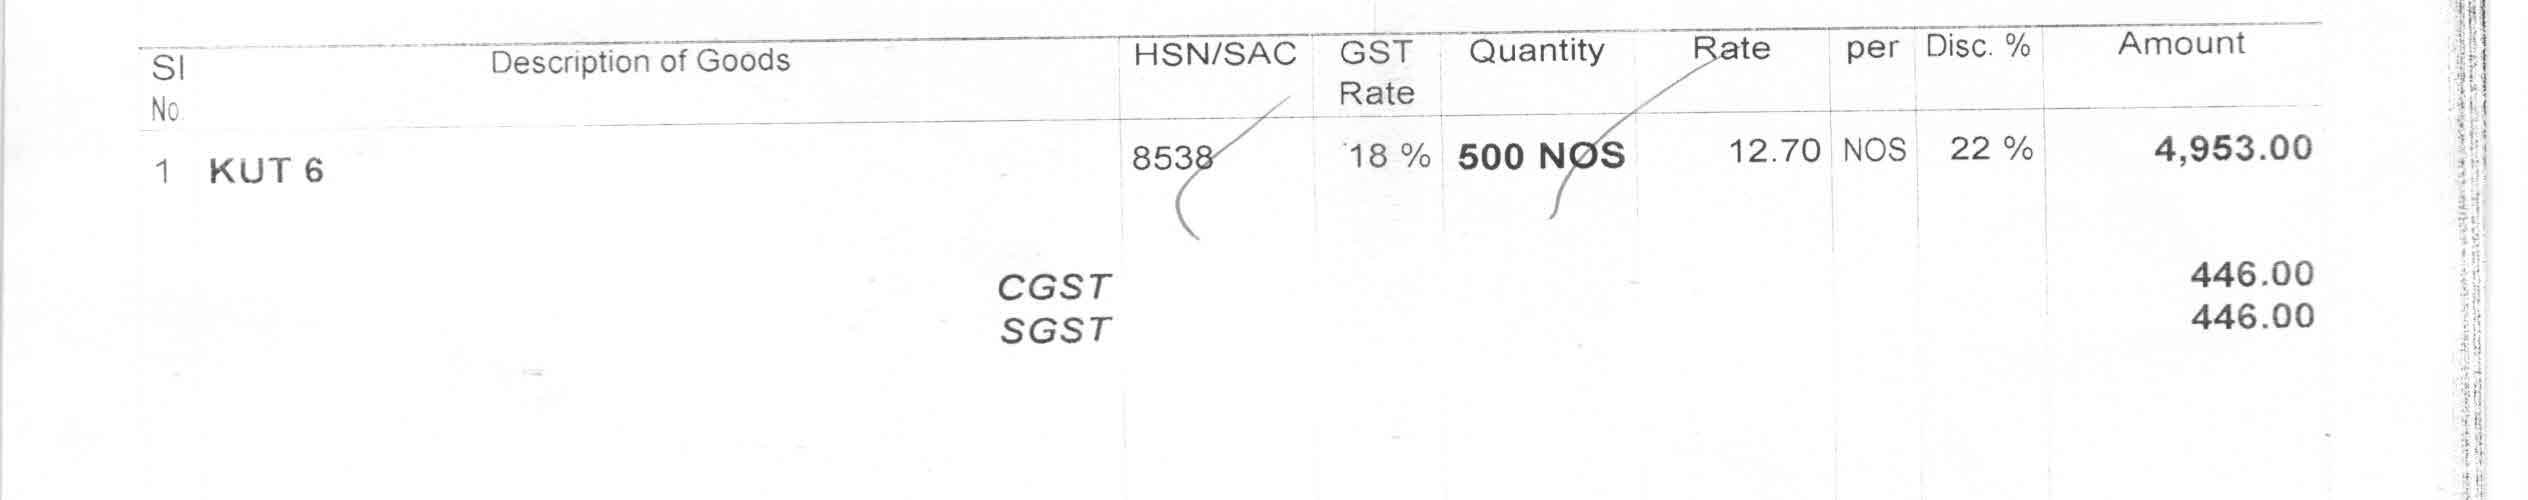

In [2]:
image_1 = cv2.imread("INVOICE.jpg", 0) ## Loading image directly as black & white
image_2 = cv2.imread("INVOICE1.jpg", 0) ## Loading image directly as black & white
image_3 = cv2.imread("INVOICE2.jpg", 0) ## Loading image directly as black & white

image_pil_1 = Image.fromarray(image_1[1000:1500, :])
image_pil_2 = Image.fromarray(image_2[1000:1500, :])
image_pil_3 = Image.fromarray(image_3[1000:2000, :])
display(image_pil_1) 

In [3]:
image_1.shape

(3504, 2528)

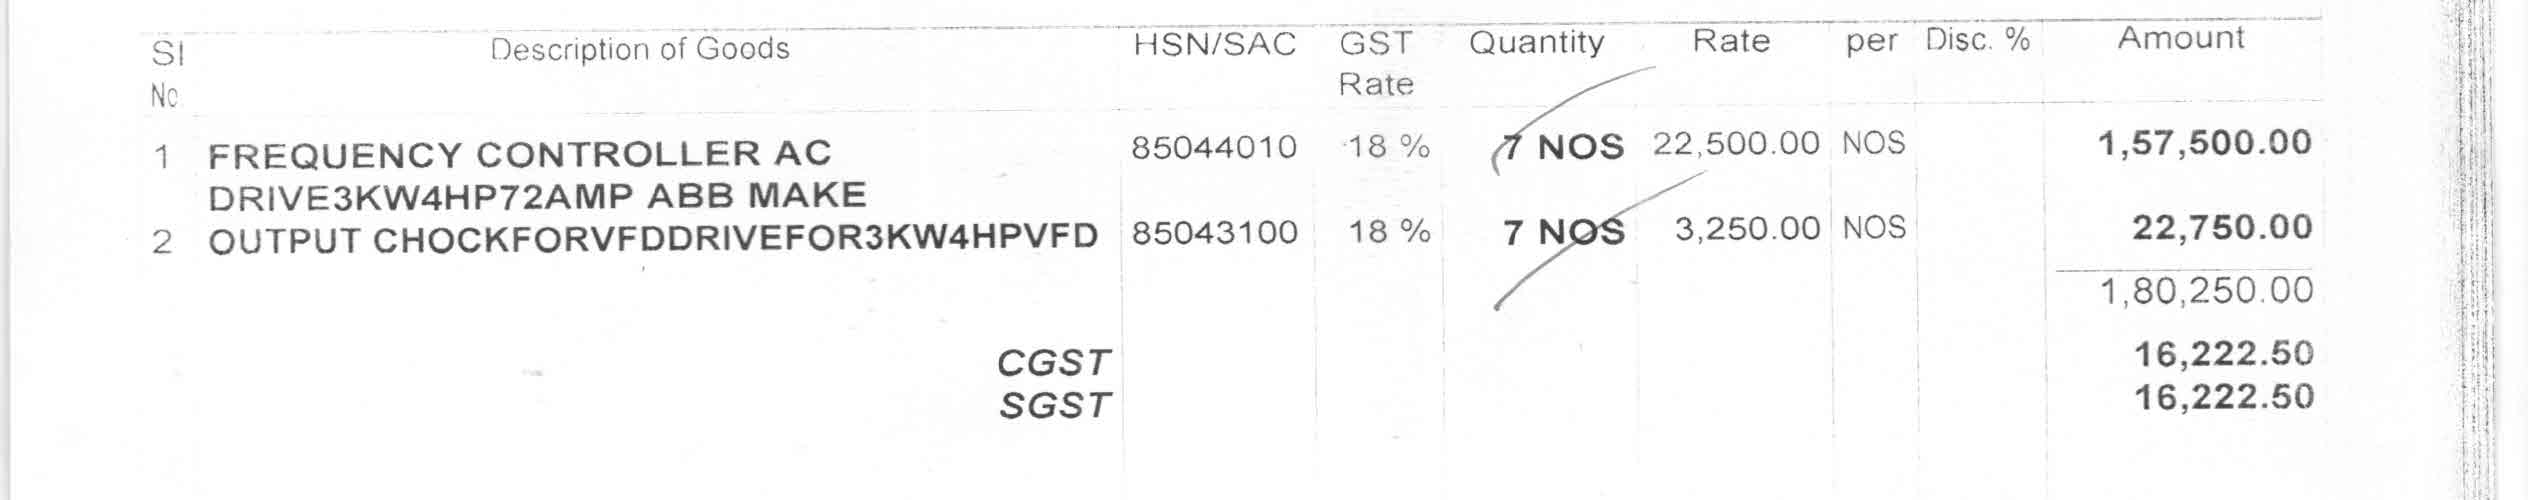

In [22]:
display(image_pil_2)

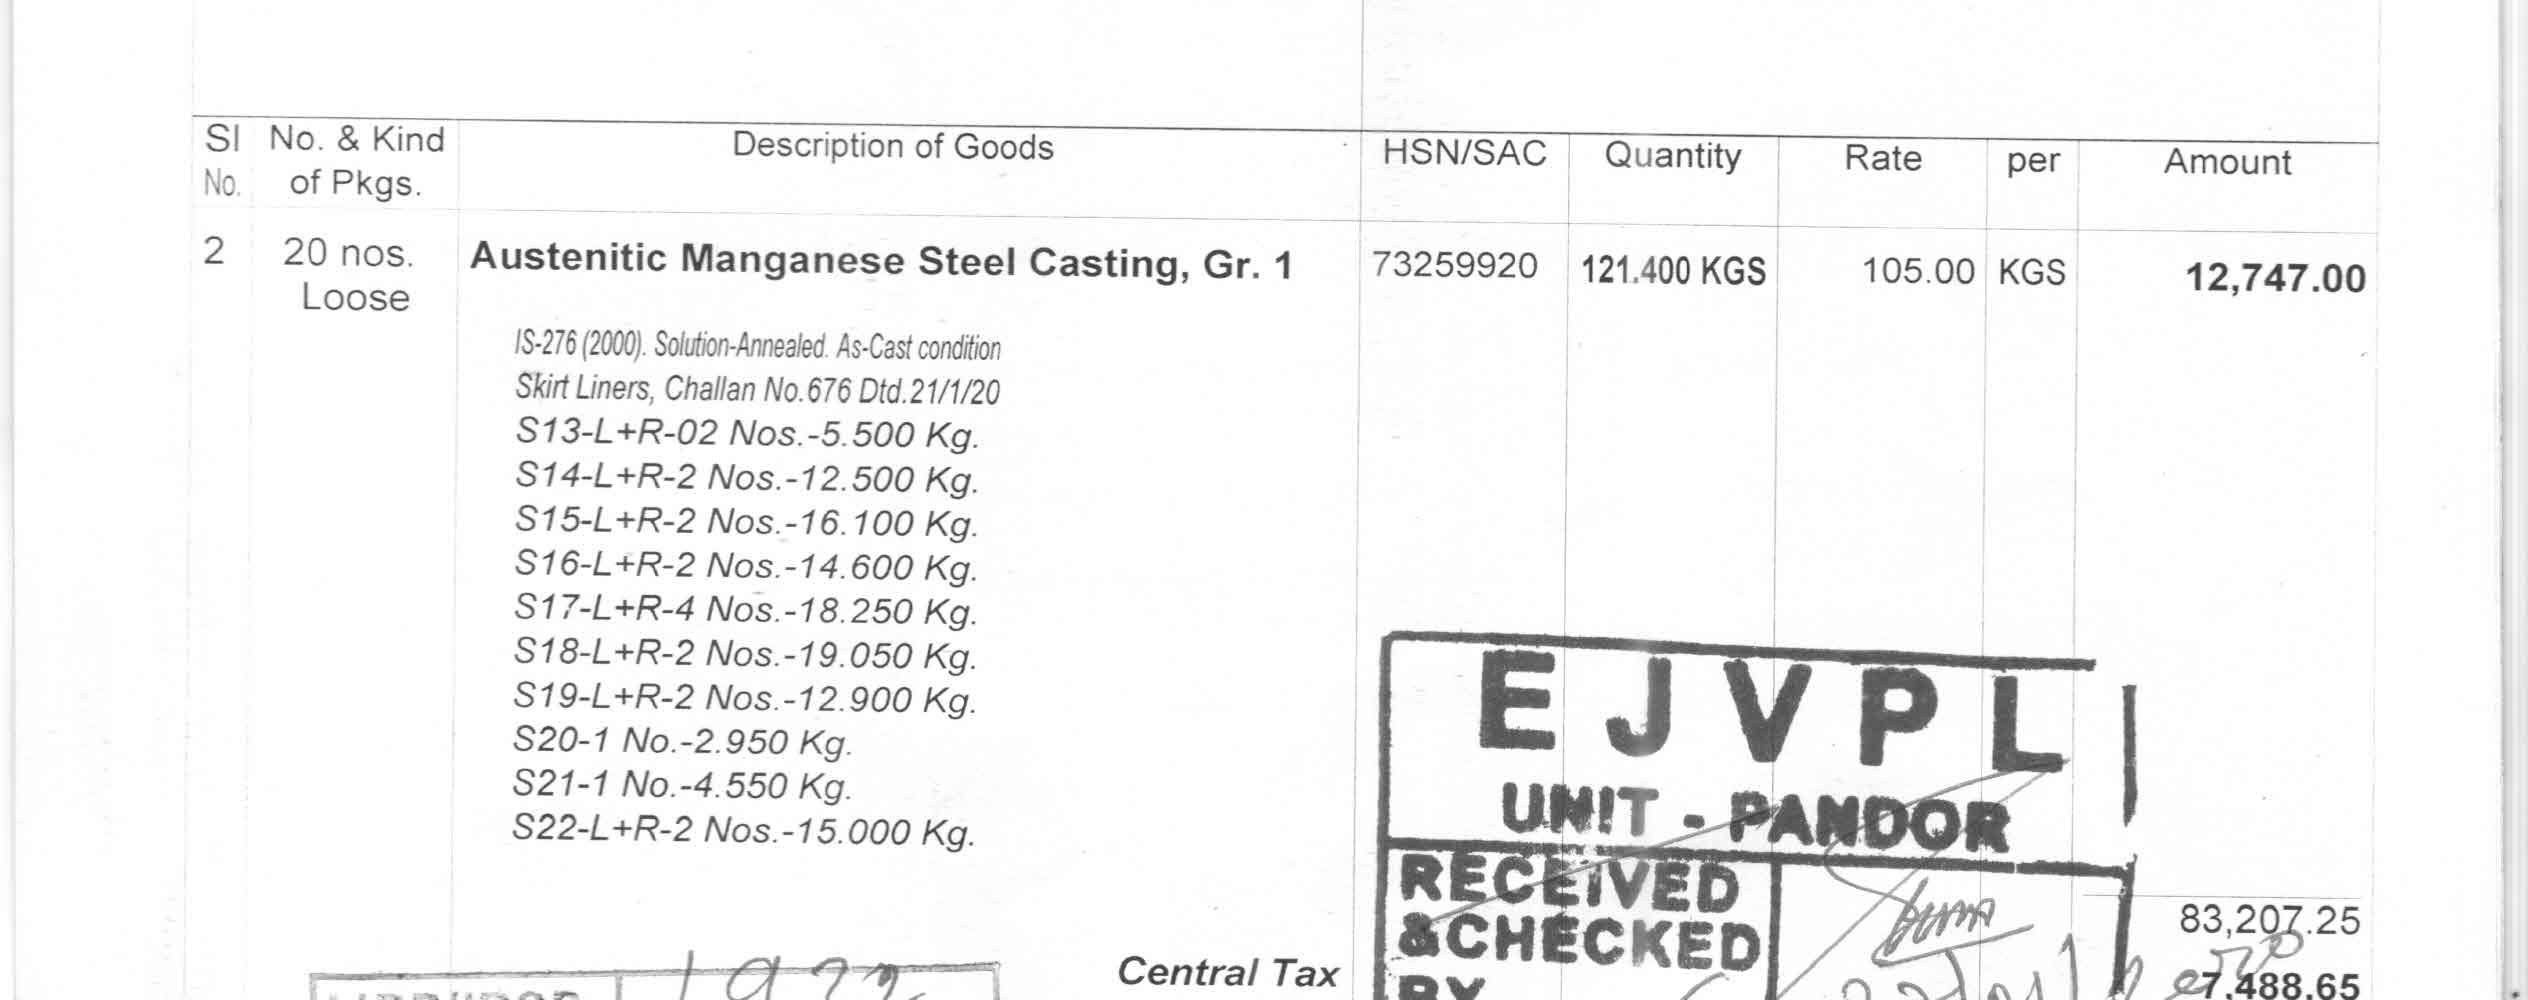

In [23]:
display(image_pil_3)

In [24]:
image_1_data = pytesseract.image_to_data(image_1[1000:1500, :], output_type=Output.DICT)
image_1_pd = pd.DataFrame(image_1_data)

image_1_pd_sorted =image_1_pd.sort_values(['top', 'left']).reset_index()
image_1_pd_sorted['text'] = image_1_pd_sorted['text'].map(lambda x: x if type(x)!=str else x.lower()) ## make Items in lower case

image_1_pd_sorted

,index,block_num,conf,height,left,level,line_num,page_num,par_num,text,top,width,word_num
0,0,0,-1,500,0,1,0,1,0,,0,2528,0
1,16,4,-1,26,603,2,0,1,0,,19,1651,0
2,17,4,-1,26,603,3,0,1,1,,19,1651,0
3,18,4,-1,26,603,4,1,1,1,,19,1651,0
4,19,4,95,26,603,5,1,1,1,,19,1651,1
5,34,5,92,47,2012,5,1,1,1,%,21,24,12
6,62,10,-1,33,2118,2,0,1,0,,22,202,0
7,63,10,-1,33,2118,3,0,1,1,,22,202,0
8,64,10,-1,33,2118,4,1,1,1,,22,202,0
9,67,10,77,2,2301,5,1,1,1,_,22,19,3


In [33]:
image_2_data = pytesseract.image_to_data(image_2[1000:1500, :], output_type=Output.DICT)
image_2_pd = pd.DataFrame(image_2_data)

#image_2_pd_sorted =image_2_pd.sort_values(['top', 'left']).reset_index()
#image_2_pd_sorted['text'] = image_2_pd_sorted['text'].map(lambda x: x if type(x)!=str else x.lower()) ## make Items in lower case

image_2_pd['text'] = image_2_pd['text'].map(lambda x: x if type(x)!=str else x.lower())

#image_2_pd_sorted

image_2_pd

,block_num,conf,height,left,level,line_num,page_num,par_num,text,top,width,word_num
0,0,-1,500,0,1,0,1,0,,0,2528,0
1,1,-1,27,151,2,0,1,0,,82,27,0
2,1,-1,27,151,3,0,1,1,,82,27,0
3,1,-1,27,151,4,1,1,1,,82,27,0
4,1,0,27,151,5,1,1,1,c,82,27,1
5,2,-1,41,492,2,0,1,0,,27,345,0
6,2,-1,41,492,3,0,1,1,,27,345,0
7,2,-1,41,492,4,1,1,1,,27,345,0
8,2,26,58,488,5,1,1,1,descrptiog,23,160,1
9,2,0,58,665,5,1,1,1,eigoods],23,142,2


In [26]:
image_3_data = pytesseract.image_to_data(image_3[1000:2000, :], output_type=Output.DICT)
image_3_pd = pd.DataFrame(image_3_data)

image_3_pd_sorted =image_3_pd.sort_values(['top', 'left']).reset_index()
image_3_pd_sorted['text'] = image_3_pd_sorted['text'].map(lambda x: x if type(x)!=str else x.lower()) ## make Items in lower case

image_3_pd_sorted

,index,block_num,conf,height,left,level,line_num,page_num,par_num,text,top,width,word_num
0,0,0,-1,1000,0,1,0,1,0,,0,2528,0
1,1,1,-1,30,193,2,0,1,0,,114,2185,0
2,2,1,-1,30,193,3,0,1,1,,114,2185,0
3,3,1,-1,30,193,4,1,1,1,,114,2185,0
4,4,1,95,30,193,5,1,1,1,,114,2185,1
5,5,2,-1,78,206,2,0,1,0,,124,2086,0
6,6,2,-1,78,206,3,0,1,1,,124,2086,0
7,7,2,-1,61,206,4,1,1,1,,124,2086,0
8,8,2,0,28,206,5,1,1,1,s,124,32,1
9,9,2,90,25,272,5,1,1,1,no.,125,50,2


In [ ]:
image_1_po_pd= image_1_pd_sorted[image_1_pd_sorted['text'].str.count('^ord')>0].reset_index(drop=True)
image_1_po_pd

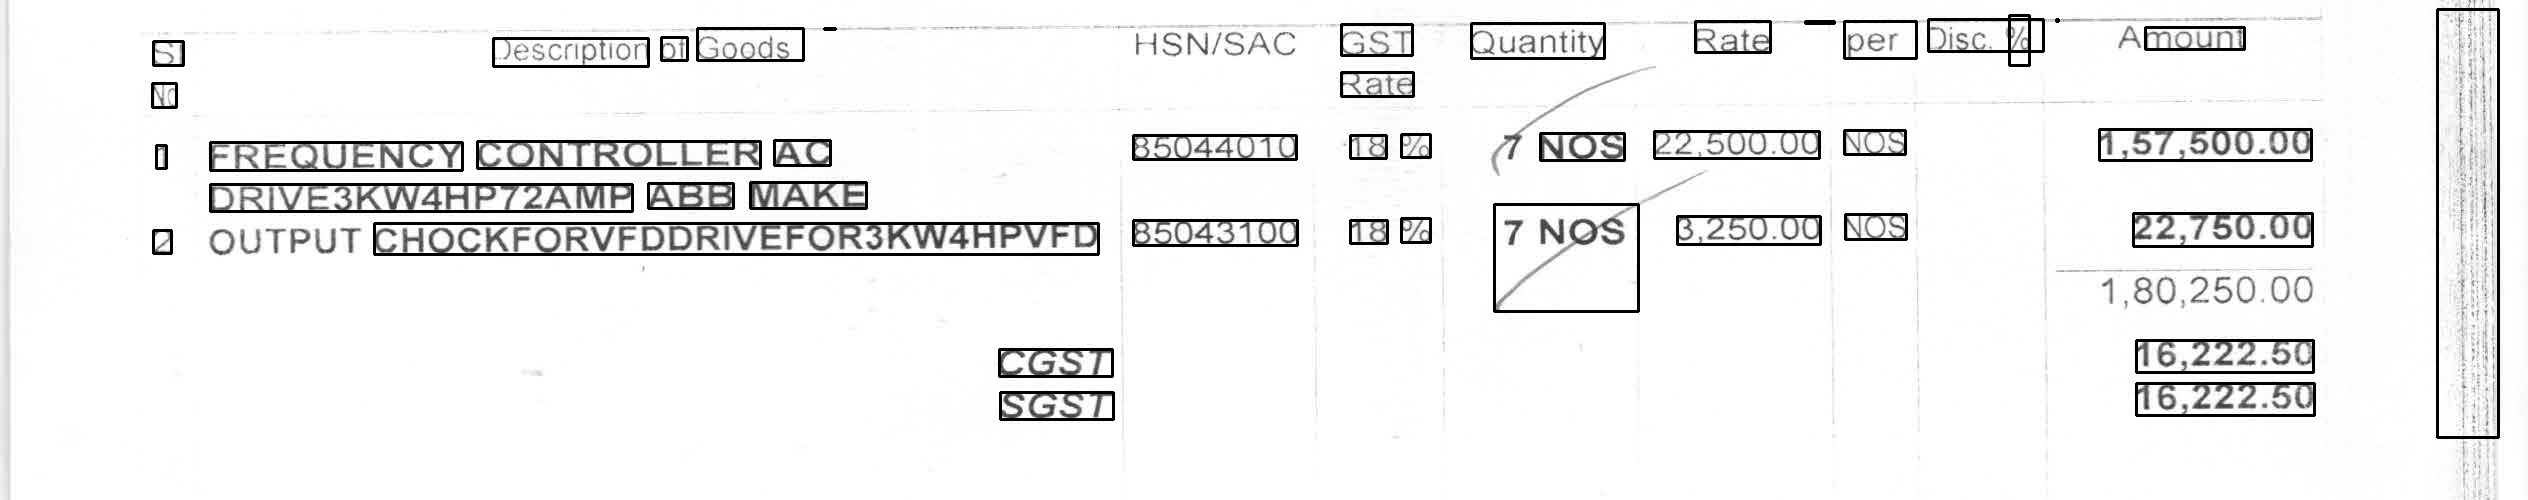

In [31]:

n_boxes = len(image_2_pd['text'])
for i in range(n_boxes):
    if int(image_2_pd['conf'][i]) > 30:
        (x, y, w, h) = (image_2_pd['left'][i], image_2_pd['top'][i], image_2_pd['width'][i], image_2_pd['height'][i])
        image_4 = cv2.rectangle(image_2[1000:1500, :], (x, y), (x + w, y + h), 0, 2)

image_4_pil = Image.fromarray(image_4)
display(image_4_pil)

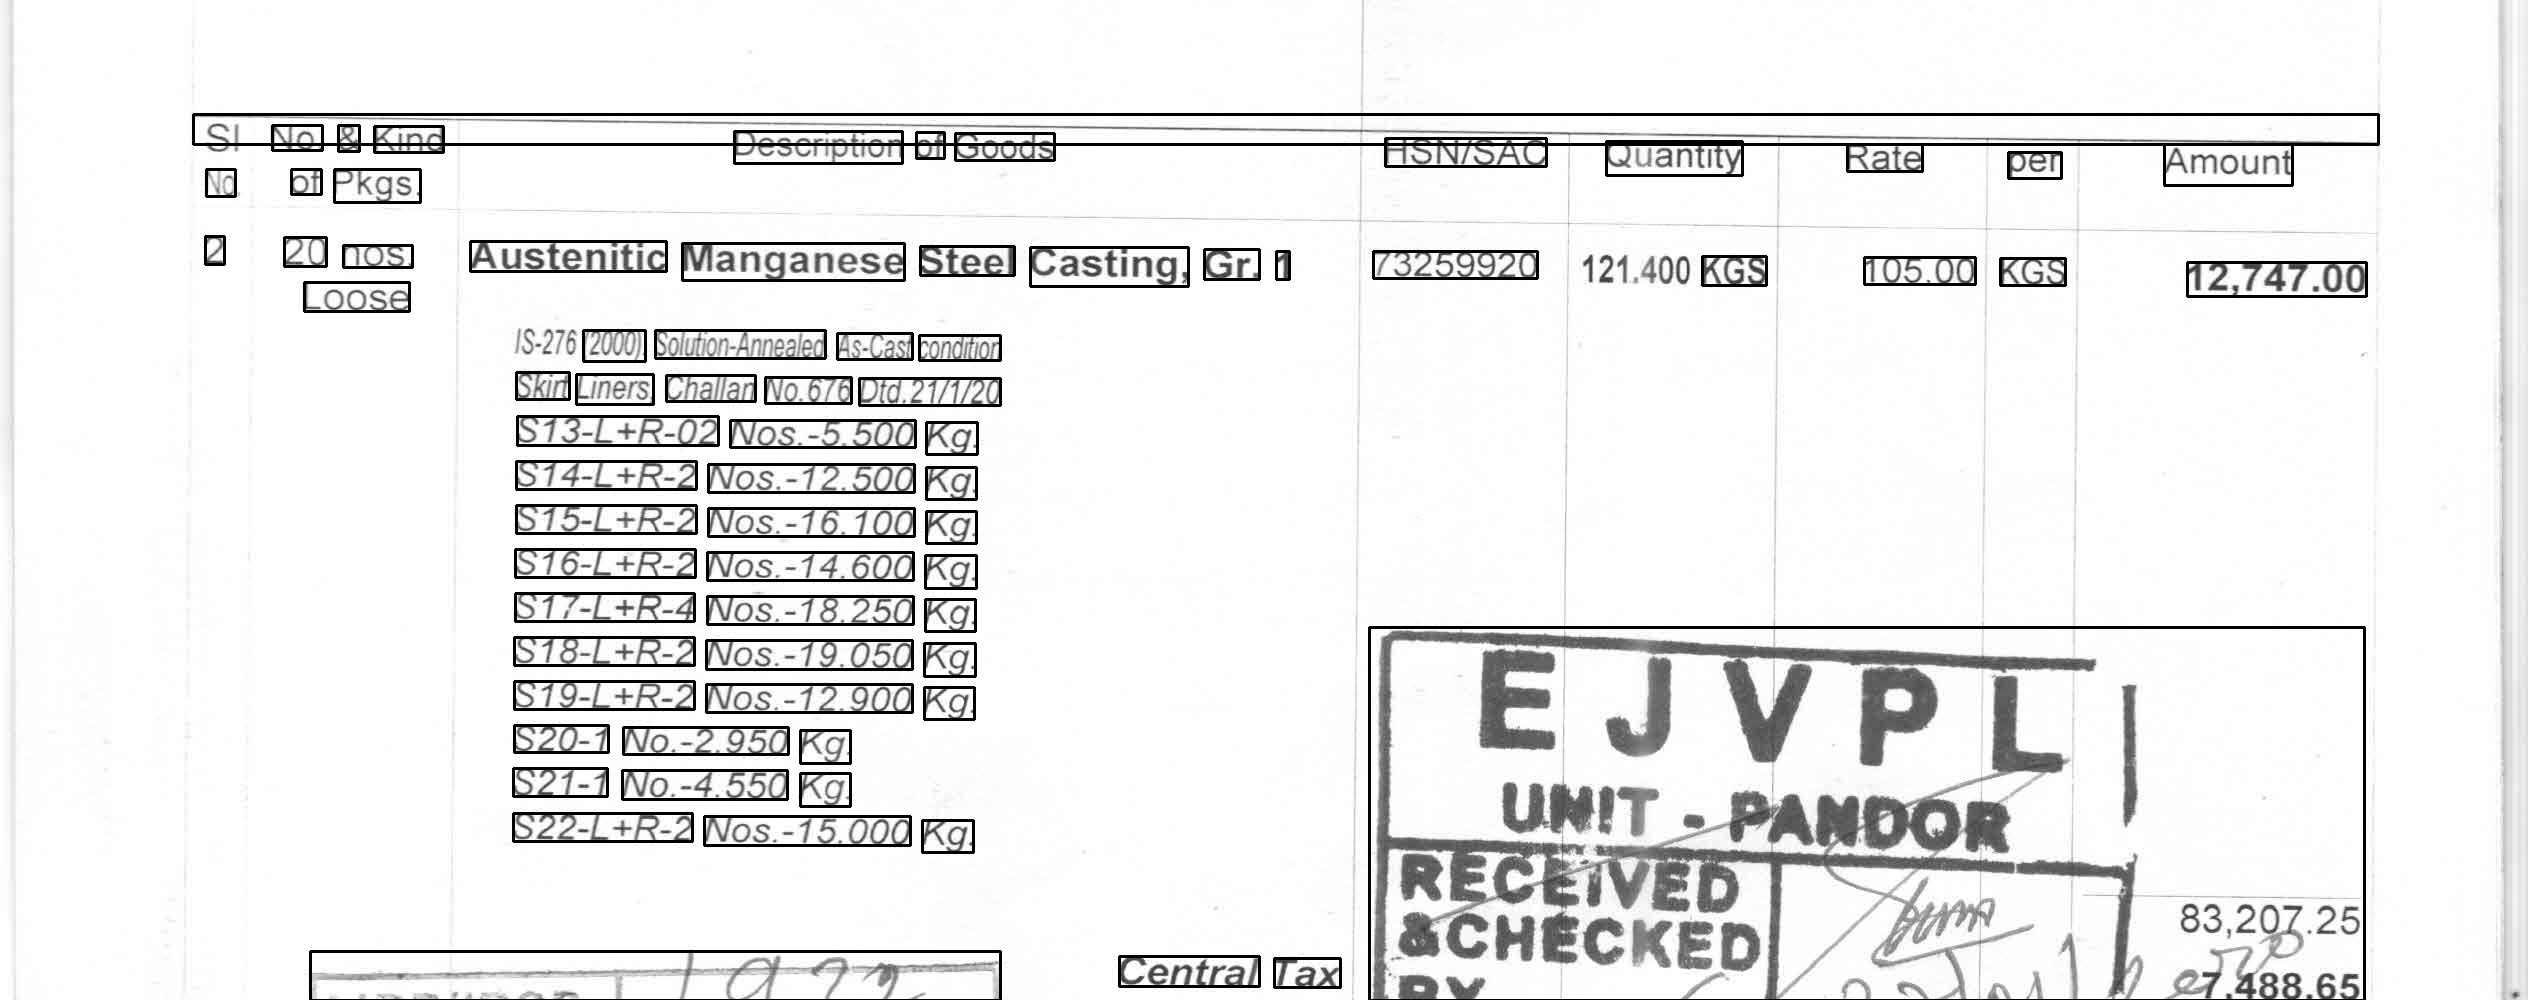

In [34]:
n_boxes_1 = len(image_3_pd['text'])
for i in range(n_boxes_1):
    if int(image_3_pd['conf'][i]) > 30:
        (x, y, w, h) = (image_3_pd['left'][i], image_3_pd['top'][i], image_3_pd['width'][i], image_3_pd['height'][i])
        image_5 = cv2.rectangle(image_3[1000:2000, :], (x, y), (x + w, y + h), 0, 2)

image_5_pil = Image.fromarray(image_5)
display(image_5_pil)